# Codebase Chat Agent

This agent is responsible for answering questions about the codebases. This is a simple ReAct agent with access to a tool to search code snippets.

If the agent need to think about the user query or make function calls, it will do in a tag `<thinking>`. This can used to understand the agent's thinking process. Integrations like OpenWebUI can use this tag to show the agent's thinking process to the user.

## Setup

In [1]:
from rich import print  # noqa: A004

from automation.agents.codebase_chat import CodebaseChatAgent

config = {"run_name": "CodebaseChat"}
codebase_chat = CodebaseChatAgent()

## Graph

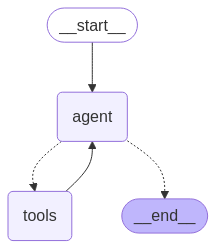

In [2]:
from IPython.display import Image, display  # noqa: A004

display(Image(codebase_chat.draw_mermaid()))

## Examples

Here are some examples of how the agent works. 

### Query unrelated to codebases

The expected behavior is that the agent will answer that it can only answer questions about the codebases or software development in general.

In [3]:
result = codebase_chat.agent.invoke({"messages": [("human", "Hi, what is the capital of France?")]}, config=config)

for message in result["messages"]:
    print(message.pretty_print())

================================ Human Message =================================

Hi, what is the capital of France?


None

================================== Ai Message ==================================
Name: codebase_answer_react_agent

I apologize, but I can only help with software development and codebase-related queries. My expertise is focused on programming, code analysis, and technical software topics. If you have a question about coding, software development, or specific repositories, I'd be happy to assist you.


None

### Query about software development

The expected behavior is that the agent will answer directly without searching the codebases. 

In [5]:
result = codebase_chat.agent.invoke({"messages": [("human", "How can I make a good software?")]}, config=config)

for message in result["messages"]:
    print(message.pretty_print())

Let me provide some key insights into creating high-quality software.

<thinking>
Query Analysis:
- Primary topic: Software development best practices
- Key concepts to explore:
  1. Software quality
  2. Development principles
  3. Best practices in software engineering

Key search terms:
- "software quality"
- "best practices"
- "software development principles"
</thinking>

Creating good software involves several critical principles:

1. Clear Requirements and Planning
- Define precise, achievable goals
- Create detailed specifications
- Understand user needs thoroughly

2. Design Principles
- Follow SOLID principles
- Use clean, modular architecture
- Implement design patterns appropriately
- Keep code simple and readable

3. Code Quality
- Write clean, maintainable code
- Use consistent coding standards
- Implement comprehensive error handling
- Follow language-specific best practices

4. Testing
- Develop comprehensive test suites
- Practice Test-Driven Development (TDD)
- Include unit, integration, and system tests
- Aim for high code coverage

5. Performance and Scalability
- Optimize algorithms and data structures
- Design with future growth in mind
- Use efficient resource management
- Implement caching strategies

6. Security
- Implement robust authentication
- Validate and sanitize all inputs
- Use encryption for sensitive data
- Follow security best practices

7. Continuous Improvement
- Regular code reviews
- Refactoring
- Stay updated with latest technologies
- Gather and incorporate user feedback

8. Documentation
- Maintain clear, updated documentation
- Document code, architecture, and processes
- Create user and developer guides

9. Version Control
- Use Git or similar version control systems
- Follow branching strategies
- Commit frequently with meaningful messages

10. Collaborative Development
- Use collaborative tools
- Practice effective communication
- Embrace pair programming
- Foster a culture of knowledge sharing

Remember, good software is not just about writing code, but creating a solution that is maintainable, scalable, and
meets user needs effectively.

### Query about a specific repository

The expected behavior is that the agent will search the codebases for the query and answer the question based on the codebases.

In [4]:
result = codebase_chat.agent.invoke(
    {"messages": [("human", "What is the main programming language used in the codebases?")]}, config=config
)

for message in result["messages"]:
    print(message.pretty_print())

[
    {
        'name': 'search_code_snippets',
        'args': {'query': '*.py', 'intent': 'Identify primary programming language across repositories'},
        'id': 'toolu_01CySHZTRVixcHs1w8sWJHXX',
        'type': 'tool_call'
    }
]

Python is the main programming language used across these codebases. This is evident from several key observations:

1. All repositories use `pyproject.toml` configuration files, which is a standard for Python projects
2. Most projects are Django-based Python applications
3. The configuration files consistently specify Python versions (3.11, 3.12)
4. Projects use Python-specific tools like:
   - pytest
   - ruff (Python linter)
   - mypy (Python type checker)
   - black (Python code formatter)

The repositories predominantly use Python 3.11 and 3.12, with a strong focus on Django web framework. They also 
utilize modern Python tooling and follow best practices for Python project configuration.

Some of the repositories include:
- daiv
- rtbot
- django-pwa
- django-auditlogs
- django-wagtail-contrib
- django-release-viewer

Each of these projects is configured with Python-specific settings and dependencies, confirming Python as the 
primary programming language.

### Query about a specific repository with follow-up questions

It's expected that the agent will answer being aware of previous messages.

In [5]:
result = codebase_chat.agent.invoke(
    {"messages": [("human", "What's the python version used on django-webhooks?")]}, config=config
)
result = codebase_chat.agent.invoke(
    {"messages": result["messages"] + [("human", "How can i install a new dependency?")]}, config=config
)
for message in result["messages"]:
    print(message.pretty_print())

================================ Human Message =================================

What's the python version used on django-webhooks?


None

================================== Ai Message ==================================
Name: codebase_answer_react_agent

[{'text': "<thinking>\nI'll search for Python version information in the django-webhooks repository, likely looking for configuration files like pyproject.toml, setup.py, or CI configuration that might specify the Python version.\n\nKey search terms:\n- Python version\n- Supported Python versions\n- Runtime configuration\n\nI'll search for files that might contain Python version specifications.\n</thinking>", 'type': 'text'}, {'id': 'toolu_01DG478WnSfafj9RM4fkQkGM', 'input': {'query': 'python_requires python_version', 'intent': 'Find the specified Python version for the project', 'repository': 'dipcode/django-webhooks'}, 'name': 'search_code_snippets', 'type': 'tool_use'}]
Tool Calls:
  search_code_snippets (toolu_01DG478WnSfafj9RM4fkQkGM)
 Call ID: toolu_01DG478WnSfafj9RM4fkQkGM
  Args:
    query: python_requires python_version
    intent: Find the specified Python versi

None

================================= Tool Message =================================
Name: search_code_snippets

<CodeSnippet repository="dipcode/django-webhooks" ref="master" path="pyproject.toml" external_link="http://127.0.0.1:8929/dipcode/django-webhooks/-/blob/master/pyproject.toml">
[project]
name = "django-webhooks"
description = "Django Webhooks is a Django app that allows you to create and manage webhooks."
readme = "README.md"
maintainers = [
  { name = "Dipcode Team", email = "team@dipcode.com" },
]
authors = [
  { name = "Dipcode Team", email = "team@dipcode.com" },
]
requires-python = ">=3.11"
classifiers = [
  "Framework :: Django",
  "Framework :: Django :: 4.1",
  "Framework :: Django :: 4.2",
  "Framework :: Django :: 5.0",
  "Intended Audience :: Developers",
  "Natural Language :: English",
  "Programming Language :: Python",
  "Programming Language :: Python :: 3 :: Only",
  "Programming Language :: Python :: 3.11",
  "Programming Language :: Python :: 3.12",
  "Topic :

None

================================== Ai Message ==================================
Name: codebase_answer_react_agent

The django-webhooks project uses Python 3.11 as its primary Python version. This is evident from multiple configuration files:

1. In `pyproject.toml`, the project requires Python 3.11 or higher:
   - `requires-python = ">=3.11"`
   - Supports Python 3.11 and 3.12 specifically

2. In the `Pipfile`, the Python version is explicitly set to 3.11:
   - `python_version = "3.11"`

3. The Ruff linter configuration also targets Python 3.11:
   - `target-version = "py311"`

The project is compatible with Django 4.1, 4.2, and 5.0, and is designed to work with Python 3.11 and 3.12.

**References:**
- [dipcode/django-webhooks/pyproject.toml](http://127.0.0.1:8929/dipcode/django-webhooks/-/blob/master/pyproject.toml)
- [dipcode/django-webhooks/Pipfile](http://127.0.0.1:8929/dipcode/django-webhooks/-/blob/master/Pipfile)


None

================================ Human Message =================================

What's the python version used on django-webhooks?


None

================================== Ai Message ==================================
Name: codebase_answer_react_agent

[{'text': "<thinking>\nI'll search for Python version information in the django-webhooks repository, likely looking for configuration files like pyproject.toml, setup.py, or CI configuration that might specify the Python version.\n\nKey search terms:\n- Python version\n- Supported Python versions\n- Runtime configuration\n\nI'll search for files that might contain Python version specifications.\n</thinking>", 'type': 'text'}, {'id': 'toolu_01DG478WnSfafj9RM4fkQkGM', 'input': {'query': 'python_requires python_version', 'intent': 'Find the specified Python version for the project', 'repository': 'dipcode/django-webhooks'}, 'name': 'search_code_snippets', 'type': 'tool_use'}]
Tool Calls:
  search_code_snippets (toolu_01DG478WnSfafj9RM4fkQkGM)
 Call ID: toolu_01DG478WnSfafj9RM4fkQkGM
  Args:
    query: python_requires python_version
    intent: Find the specified Python versi

None

================================= Tool Message =================================
Name: search_code_snippets

<CodeSnippet repository="dipcode/django-webhooks" ref="master" path="pyproject.toml" external_link="http://127.0.0.1:8929/dipcode/django-webhooks/-/blob/master/pyproject.toml">
[project]
name = "django-webhooks"
description = "Django Webhooks is a Django app that allows you to create and manage webhooks."
readme = "README.md"
maintainers = [
  { name = "Dipcode Team", email = "team@dipcode.com" },
]
authors = [
  { name = "Dipcode Team", email = "team@dipcode.com" },
]
requires-python = ">=3.11"
classifiers = [
  "Framework :: Django",
  "Framework :: Django :: 4.1",
  "Framework :: Django :: 4.2",
  "Framework :: Django :: 5.0",
  "Intended Audience :: Developers",
  "Natural Language :: English",
  "Programming Language :: Python",
  "Programming Language :: Python :: 3 :: Only",
  "Programming Language :: Python :: 3.11",
  "Programming Language :: Python :: 3.12",
  "Topic :

None

================================== Ai Message ==================================
Name: codebase_answer_react_agent

The django-webhooks project uses Python 3.11 as its primary Python version. This is evident from multiple configuration files:

1. In `pyproject.toml`, the project requires Python 3.11 or higher:
   - `requires-python = ">=3.11"`
   - Supports Python 3.11 and 3.12 specifically

2. In the `Pipfile`, the Python version is explicitly set to 3.11:
   - `python_version = "3.11"`

3. The Ruff linter configuration also targets Python 3.11:
   - `target-version = "py311"`

The project is compatible with Django 4.1, 4.2, and 5.0, and is designed to work with Python 3.11 and 3.12.

**References:**
- [dipcode/django-webhooks/pyproject.toml](http://127.0.0.1:8929/dipcode/django-webhooks/-/blob/master/pyproject.toml)
- [dipcode/django-webhooks/Pipfile](http://127.0.0.1:8929/dipcode/django-webhooks/-/blob/master/Pipfile)


None

================================ Human Message =================================

How can i install a new dependency?


None

================================== Ai Message ==================================
Name: codebase_answer_react_agent

[{'text': "<thinking>\nI'll search for dependency management files and look for guidance on adding dependencies in the django-webhooks project.\n\nKey analysis:\n- Dependency management tools: Pipfile, pyproject.toml\n- Potential methods: pipenv, pip, poetry\n- Need to find installation and dependency addition process\n</thinking>", 'type': 'text'}, {'id': 'toolu_01MeAWTbPMnPnyLE55CaKXk4', 'input': {'query': 'dependencies install add new dependency', 'intent': 'Find how to add a new dependency to the project', 'repository': 'dipcode/django-webhooks'}, 'name': 'search_code_snippets', 'type': 'tool_use'}]
Tool Calls:
  search_code_snippets (toolu_01MeAWTbPMnPnyLE55CaKXk4)
 Call ID: toolu_01MeAWTbPMnPnyLE55CaKXk4
  Args:
    query: dependencies install add new dependency
    intent: Find how to add a new dependency to the project
    repository: dipcode/django-webhooks


None

================================= Tool Message =================================
Name: search_code_snippets

<CodeSnippet repository="dipcode/django-webhooks" ref="master" path="pyproject.toml" external_link="http://127.0.0.1:8929/dipcode/django-webhooks/-/blob/master/pyproject.toml">
]
dynamic = [
  "version",
]
dependencies = [
  "celery<6,>=5.4",
  "django<5.1,>=4.1",
  "django-appconf<2,>=1",
  "django-extensions<4,>=3.2",
  "djangorestframework<4,>=3.14",
  "drf-spectacular<1,>=0.26",
  "pydantic<3,>=2.8",
  "requests<3,>=2.32",
]
urls.Changelog = "https://git.eurotux.com/dipcode/python/django-webhooks/blob/master/CHANGELOG.md"
urls.Homepage = "https://git.eurotux.com/dipcode/python/django-webhooks"
urls.Issues = "https://git.eurotux.com/dipcode/python/django-webhooks/issues"
</CodeSnippet>
<CodeSnippet repository="dipcode/django-webhooks" ref="master" path="Pipfile" external_link="http://127.0.0.1:8929/dipcode/django-webhooks/-/blob/master/Pipfile">
[[source]]
url = "https://pypi

None

================================== Ai Message ==================================
Name: codebase_answer_react_agent

To install a new dependency in this project, you have two main approaches:

1. For Production Dependencies:
```shell
# Add the dependency to pyproject.toml under the [project] section
# Example:
pipenv install new-package==version
```

2. For Development Dependencies:
```shell
# Add the dependency to the [dev-packages] section in Pipfile
pipenv install --dev new-package==version
```

Key guidelines:
- Use `pipenv` for dependency management
- Specify version constraints (e.g., `package<6,>=5.4`)
- For development, use the `--dev` flag
- Update both `pyproject.toml` and `Pipfile`

After adding a dependency:
```shell
# Install all dependencies
$ pipenv install --dev

# Install pre-commit hooks (recommended)
$ pipenv run pre-commit install
```

Pro Tips:
- Always specify version constraints
- Consider the project's Python version (3.11 in this case)
- Run tests after adding n

None